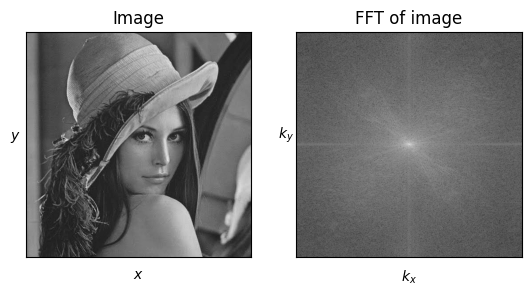

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 
image_filename = Path().resolve().parents[0] / "images"/ "lena.jpg"

# 512 x 512

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)
def calculate_i2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.ifft2(ft)
    return np.fft.fftshift(ft)

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale
plt.set_cmap("gray")
ft = calculate_2dft(image)
plt.subplot(121)
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.xticks([])
plt.yticks([])
plt.imshow(image)
plt.title("Image")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.xlabel("$k_{x}$")
plt.ylabel("$k_{y}$", rotation=0)
plt.xticks([])
plt.yticks([])
plt.title("FFT of image")
plt.show()

In [2]:
def get_filter(image: np.array, size: int, high: bool):
    filter_image = np.empty_like(image)
    shape = image.shape[0]
    center = image.shape[0]//2 - 1
    for x in range(shape):
        for y in range(shape): 
            if (x-center)**2 + (y-center)**2 > (size)**2 if high else (x-center)**2 + (y-center)**2 < (size)**2 :
                filter_image[x, y] = 1
            else:
                filter_image[x, y] = 0
    return filter_image

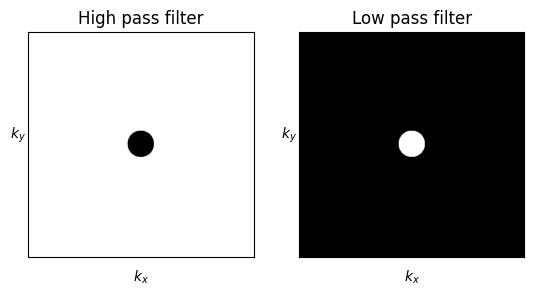

In [4]:
high_pass = get_filter(image, 30, True)
plt.subplot(121)
plt.title("High pass filter")
#plt.axis("off");
plt.xlabel("$k_{x}$")
plt.ylabel("$k_{y}$", rotation=0)
plt.xticks([])
plt.yticks([])
plt.imshow(high_pass);
plt.subplot(122)
low_pass = get_filter(image, 30, False)
plt.title("Low pass filter")
plt.xlabel("$k_{x}$")
plt.ylabel("$k_{y}$", rotation=0)
plt.xticks([])
plt.yticks([])
plt.imshow(low_pass);

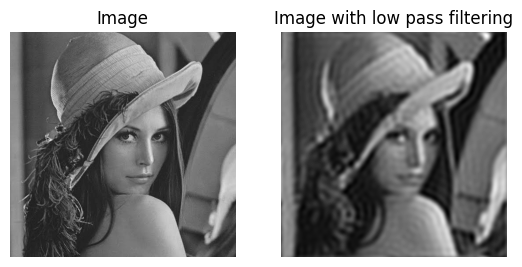

In [5]:
plt.subplot(121)
plt.imshow(image)
plt.title("Image")
plt.axis("off")
plt.subplot(122)
plt.title("Image with low pass filtering")
plt.imshow(calculate_i2dft(ft * low_pass).real)
plt.axis("off");

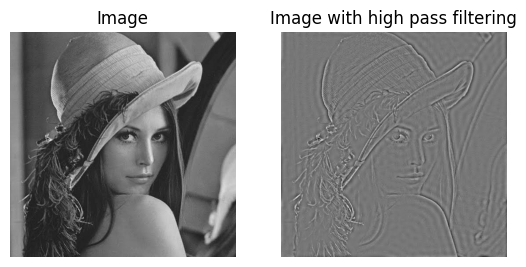

In [6]:
plt.subplot(121)
plt.imshow(image)
plt.title("Image")
plt.axis("off")
plt.subplot(122)
plt.title("Image with high pass filtering")
plt.imshow(calculate_i2dft(ft * high_pass).real)
plt.axis("off");